The Iris flower dataset consists of three species: setosa, versicolor,and virginica. These species can be distinguished based on their measurements. This Iris dataset is a well-known dataset in the field of machine learning.

In [1]:
# 1. IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2.LOADING DATASET 
data = pd.read_csv("C:\\Users\\User\\Documents\\CODSOFT\\TASK3 - iris dataset\\IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# 3.EXPLORING DATASET
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#summary statistics 
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#checking for missing values 
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
#Display the number of samples for each species
data["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
#Converting species names into numerical form

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])
data["species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

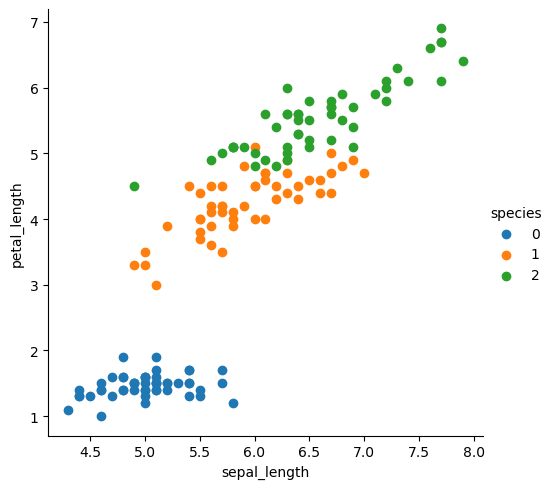

In [9]:
# 4. DATA VISUALIZATION
sns.FacetGrid(data,hue='species',height=5).map(plt.scatter,'sepal_length','petal_length').add_legend()

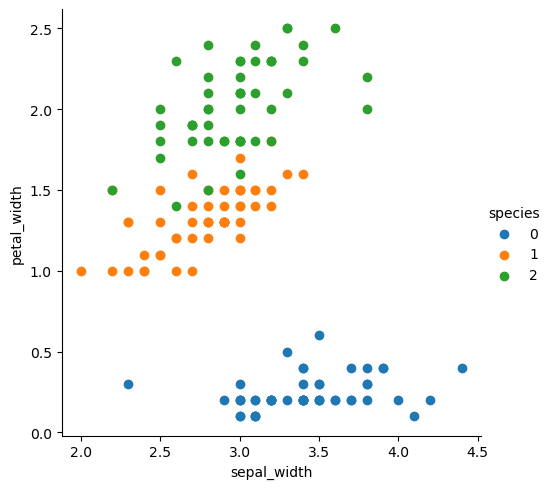

In [10]:
sns.FacetGrid(data,hue='species',height=5).map(plt.scatter,'sepal_width','petal_width').add_legend()

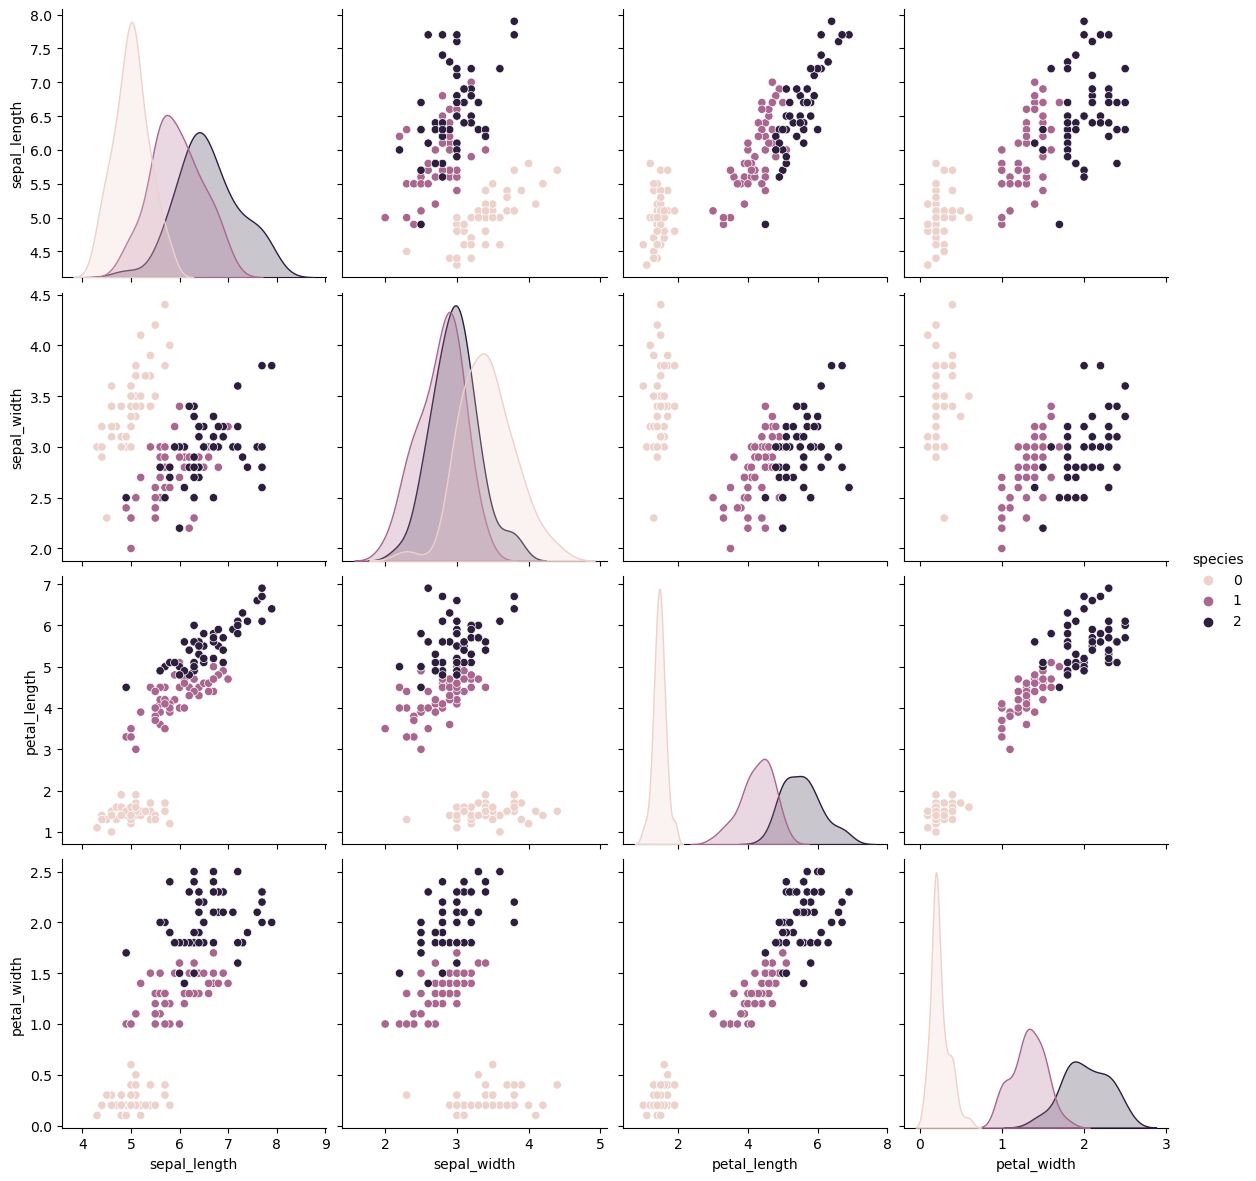

In [11]:
sns.pairplot(data,hue="species",size=3)
plt.show()

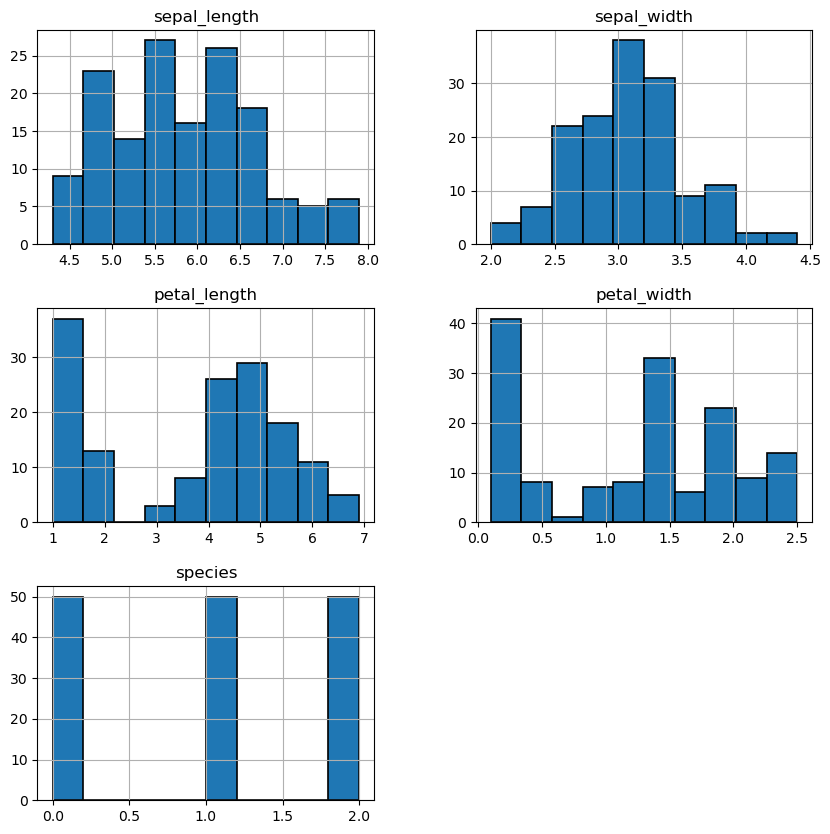

In [12]:
data.hist(edgecolor='black',linewidth=1.2, figsize=(10,10));

<Axes: >

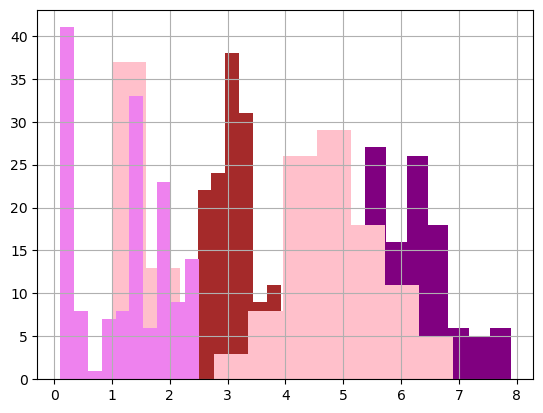

In [13]:
#Plotting histogram for all the features together
data['sepal_length'].hist(color='purple')
data['sepal_width'].hist(color='brown')
data['petal_length'].hist(color='pink')
data['petal_width'].hist(color='violet')

In [14]:
# scatter plot to visualize relationships between features
species=[0,1,2]
color=['blue','orange','green']

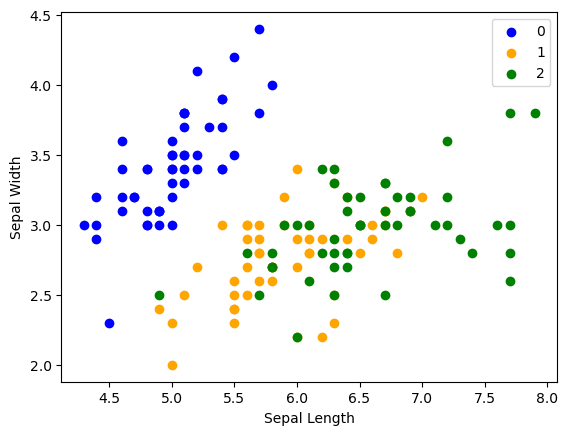

In [15]:
# scatter plot for Sepal Length and Sepal Width

for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=color[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

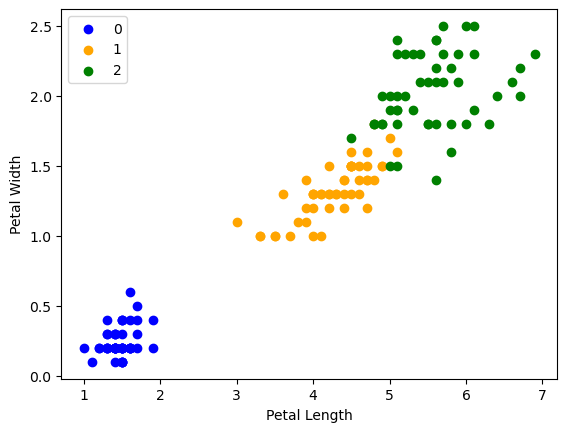

In [16]:
# Scatter plot for Petal Length vs Petal Width 

for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = color[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

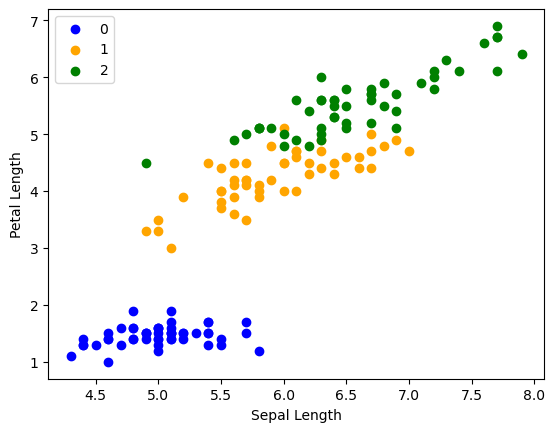

In [17]:
# Scatter plot for Petal Length vs Sepal Length

for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = color[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

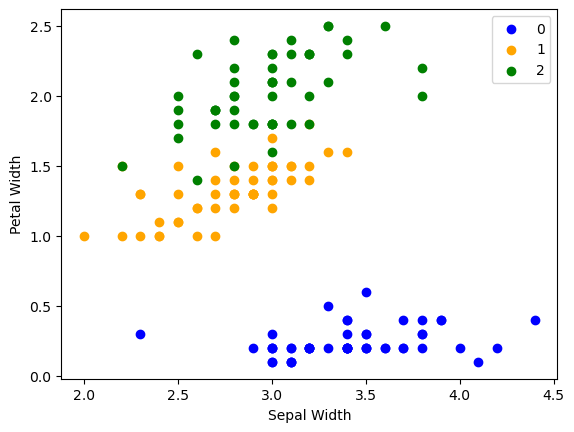

In [18]:
# Scatter plot for Sepal Width vs Petal Width

for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = color[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

 CORRELATION MATRIX
 
 A correlation matrix is a table that displays the correlation coefficients between different variables in a dataset. Correlation coefficients quantify the strength and direction of the linear relationship between two variables. The values  range from -1 to 1, where:

1: A perfect positive correlation, meaning that as one variable increases, the other variable also increases proportionally.
0: No correlation, indicating that there's no linear relationship between the variables. 
-1: A perfect negative correlation, implying that as one variable increases, the other variable decreases proportionally.

In [19]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

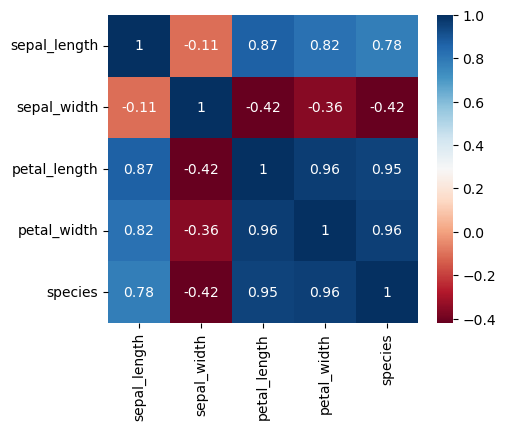

In [20]:
corr=data.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='RdBu')

In [21]:
# 5. SPLITTING THE DATASET
#splitting the data into features X and target Y
X = data.drop('species',axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
Y = data["species"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size =0.3,random_state=1)

In [24]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [25]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


In [26]:
y_train

118    2
18     0
4      0
45     0
59     1
      ..
133    2
137    2
72     1
140    2
37     0
Name: species, Length: 105, dtype: int32

In [27]:
y_test

14     0
98     1
75     1
16     0
131    2
56     1
141    2
44     0
29     0
120    2
94     1
5      0
102    2
51     1
78     1
42     0
92     1
66     1
31     0
35     0
90     1
84     1
77     1
40     0
125    2
99     1
33     0
19     0
73     1
146    2
91     1
135    2
69     1
128    2
114    2
48     0
53     1
28     0
54     1
108    2
112    2
17     0
119    2
103    2
58     1
Name: species, dtype: int32

In [28]:
# 6. MODEL BUILDING
model=LogisticRegression()

# model fitting
model.fit(x_train,y_train)

# model accuracy
print("Accuracy(Logistic Regression): ",model.score(x_test,y_test)*100)

Accuracy(Logistic Regression):  97.77777777777777


In [32]:
# CONFUSION MATRIX
y_pred=model.predict(x_test)

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)

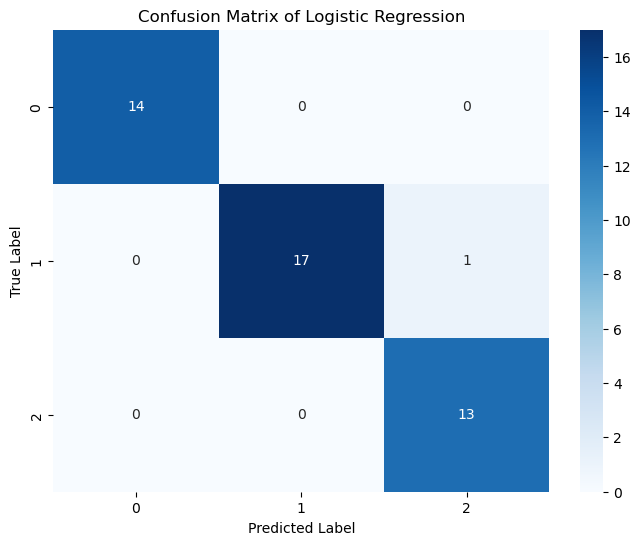

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()